<a href="https://colab.research.google.com/github/Rakib-Ul-Haque/Crime_and_market_data_analysis/blob/main/coding_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Thank you for applying to Double River! This is a coding assessment you can use to showcase your programming skills. We expect you to have this completed and submitted by the night of Saturday July 17th (any time zone).

This coding assessment has 2 parts. It is very open-ended, and there is not a single correct response. There are many possible approaches; choose one or two rather than attacking the problem every possible way. We do not expect you to take more than 3-4 hours at maximum. You will be assessed on your creativity and the clarity with which you explain the steps you take. Please document your data exploration and modeling process. We expect you to use Python. Feel free to use any open source packages you desire.

Your submission should consist of a zipped directory named lastname_firstname.zip (with your own last name and first name substituted) containing 
1. coding_exercise.ipynb, containing your code and relevant figures. Feel free to just modify this file you are reading
2. crime_pred.csv, containing your predictions for Part 1
3. market1_pred.csv, containing half your predictions for Part 2
4. market2_pred.csv, containing the other half of your predictions for Part 2
5. Any other relevant scripts you wrote to solve the problem

The required format for 2-4 will be explained below.

To submit, email your zipped folder to robertwagner@doubleriver.com and taylorsorensen@doubleriver.com by the night of Saturday July 17th (any time zone). If you need an extension, please let us know. If you have any questions, please reach out to us. Good luck!

# Part 1

crime_2020.csv and crime_2021.csv contain real data on crime in Boston. Predict the number of vandalism incidents and the number of verbal disputes (OFFENSE_DESCRIPTION=="VANDALISM" or OFFENSE_DESCRIPTION=="VERBAL DISPUTE") for each day from July 9, 2021 to December 31, 2021. Save your predictions to a csv named crime_pred.csv, with the following format:

| Date | VANDALISM | VERBAL DISPUTE |
| --- | --- | --- |
| 2021-07-09 | prediction | prediction |
| --- | --- | --- |

Obviously, we can't assess your actual prediction accuracy. We will focus on your modeling decisions.

In [1]:
#import libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=12,6

In [2]:
# taking input for 2020
crime_2020 = pd.read_csv("crime_2020.csv")
crime_2020 = crime_2020[(crime_2020['OFFENSE_DESCRIPTION']=="VANDALISM") | (crime_2020['OFFENSE_DESCRIPTION']=="VERBAL DISPUTE")]
crime_2020.reset_index(drop=True, inplace=True)
# crime_2020.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Preparing data for 2020
crime_2020_u= crime_2020[["OFFENSE_DESCRIPTION","OCCURRED_ON_DATE"]]
crime_2020_u["OCCURRED_ON_DATE"]=pd.to_datetime(crime_2020_u["OCCURRED_ON_DATE"]).dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
#taking input for 2021
crime_2021 = pd.read_csv("crime_2021.csv")
crime_2021 = crime_2021[(crime_2021['OFFENSE_DESCRIPTION']=="VANDALISM") | (crime_2021['OFFENSE_DESCRIPTION']=="VERBAL DISPUTE")]
crime_2021.reset_index(drop=True, inplace=True)
# crime_2021.tail()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Preparing data for 2021
crime_2021_u= crime_2021[["OFFENSE_DESCRIPTION","OCCURRED_ON_DATE"]]
crime_2021_u["OCCURRED_ON_DATE"]=pd.to_datetime(crime_2021_u["OCCURRED_ON_DATE"]).dt.date


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# joining 2020 and 2021 datsets then seperating crimes
full_data = pd.concat([crime_2020_u, crime_2021_u])
full_data_VANDALISM = full_data[(full_data['OFFENSE_DESCRIPTION']=="VANDALISM")]
full_data_VERBAL_DISPUTE = full_data[(full_data['OFFENSE_DESCRIPTION']=="VERBAL DISPUTE")]

In [7]:
# Counting number of VANDALISM and convering into dictonaries 
VANDALISM_count=full_data_VANDALISM['OCCURRED_ON_DATE'].value_counts()
# VANDALISM_count
VANDALISM_count_dic=VANDALISM_count.to_dict()
# VANDALISM_count_dic

In [8]:
# Mapping data set for VANDALISM
rng_VANDALISM = pd.date_range('2020-01-1', periods=555, freq='D')
df_VANDALISM = pd.DataFrame({ 'Date': rng_VANDALISM, 'Counts' : rng_VANDALISM}) 

# print (df)
df_VANDALISM["Counts"]=df_VANDALISM["Counts"].map(VANDALISM_count_dic)
df_VANDALISM=df_VANDALISM.fillna(0)
df_VANDALISM

,Date,Counts
0,2020-01-01,10.0
1,2020-01-02,10.0
2,2020-01-03,5.0
3,2020-01-04,10.0
4,2020-01-05,7.0
...,...,...
550,2021-07-04,13.0
551,2021-07-05,15.0
552,2021-07-06,5.0
553,2021-07-07,4.0


In [9]:
# Counting number of VERBAL_DISPUTE and convering into dictionaries
VERBAL_DISPUTE_count=full_data_VERBAL_DISPUTE['OCCURRED_ON_DATE'].value_counts()
# VERBAL_DISPUTE_count
VERBAL_DISPUTE_count_dic=VERBAL_DISPUTE_count.to_dict()
# VERBAL_DISPUTE_count_dic

In [10]:
# Mapping data set for VERBAL_DISPUTE
rng_VERBAL_DISPUTE = pd.date_range('2020-01-1', periods=555, freq='D')
df_VERBAL_DISPUTE = pd.DataFrame({ 'Date': rng_VERBAL_DISPUTE, 'Counts' : rng_VERBAL_DISPUTE}) 

# print (df)
df_VERBAL_DISPUTE["Counts"]=df_VERBAL_DISPUTE["Counts"].map(VERBAL_DISPUTE_count_dic)
df_VERBAL_DISPUTE=df_VERBAL_DISPUTE.fillna(0)
df_VERBAL_DISPUTE

,Date,Counts
0,2020-01-01,6.0
1,2020-01-02,5.0
2,2020-01-03,2.0
3,2020-01-04,3.0
4,2020-01-05,1.0
...,...,...
550,2021-07-04,3.0
551,2021-07-05,9.0
552,2021-07-06,5.0
553,2021-07-07,5.0


In [11]:
# df_VERBAL_DISPUTE.info()
# df_VANDALISM.info()

In [12]:
#changing index for both datasets
indexed_VANDALISM=df_VANDALISM.set_index(['Date'])
indexed_VERBAL_DISPUTE=df_VERBAL_DISPUTE.set_index(['Date'])

In [13]:
# indexed_VANDALISM
# indexed_VERBAL_DISPUTE

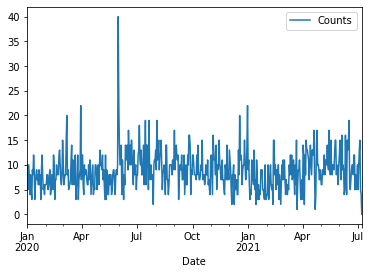

In [14]:
indexed_VANDALISM.plot()
plt.show()

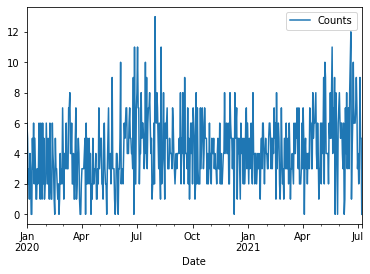

In [15]:
indexed_VERBAL_DISPUTE.plot()
plt.show()

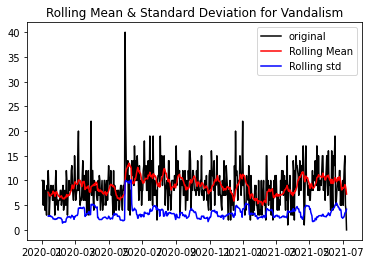

Results of Dickey-Fuller for vandalism:
Test Stat.                    -8.430820e+00
p-value                        1.872301e-13
#lags used                     4.000000e+00
NUmber of Observations Used    5.500000e+02
Critical Value(1%)            -3.442296e+00
Critical Value(5%)            -2.866809e+00
Critical Value(10%)           -2.569576e+00
dtype: float64


In [16]:
#Rolling stat. of VANDALISM  and Plot Rolling stat. of VANDALISM
rolmean_VANDALISM =indexed_VANDALISM.rolling(window=12).mean()
rolstd_VANDALISM =indexed_VANDALISM.rolling(window=12).std()
# print(rolmean_VANDALISM, rolstd_VANDALISM)

orig_VANDALISM = plt.plot(indexed_VANDALISM, color='black',label='original')
mean_VANDALISM = plt.plot(rolmean_VANDALISM, color='red',label='Rolling Mean')
std_VANDALISM = plt.plot(rolstd_VANDALISM, color='blue', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for Vandalism')
plt.show(block=False)  

from statsmodels.tsa.stattools import adfuller
#Dickey-Fuller of VANDALISM  
print('Results of Dickey-Fuller for vandalism:')
dftest_Vandalism = adfuller(indexed_VANDALISM['Counts'],autolag='AIC')
dfoutput_Vandalism = pd.Series(dftest_Vandalism[0:4], index=['Test Stat.','p-value', '#lags used', 'NUmber of Observations Used'])
for key,value in dftest_Vandalism[4].items():
  dfoutput_Vandalism['Critical Value(%s)'%key]=value
print(dfoutput_Vandalism)

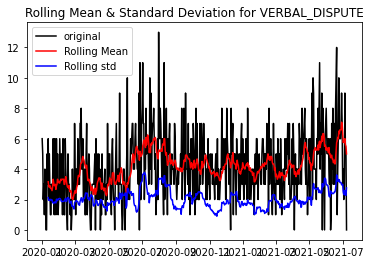

Results of Dickey-Fuller for VERBAL_DISPUTE:
Test Stat.                      -3.231635
p-value                          0.018225
#lags used                      14.000000
NUmber of Observations Used    540.000000
Critical Value(1%)              -3.442518
Critical Value(5%)              -2.866907
Critical Value(10%)             -2.569629
dtype: float64


In [17]:
#Rolling stat. of VERBAL_DISPUTE
rolmean_VERBAL_DISPUTE =indexed_VERBAL_DISPUTE.rolling(window=12).mean()
rolstd_VERBAL_DISPUTE =indexed_VERBAL_DISPUTE.rolling(window=12).std()
# print(rolmean_VERBAL_DISPUTE, rolstd_VERBAL_DISPUTE)



#Plot Rolling stat. of VERBAL_DISPUTE
orig_VERBAL_DISPUTE = plt.plot(indexed_VERBAL_DISPUTE, color='black',label='original')
mean_VERBAL_DISPUTE = plt.plot(rolmean_VERBAL_DISPUTE, color='red',label='Rolling Mean')
std_VERBAL_DISPUTE = plt.plot(rolstd_VERBAL_DISPUTE, color='blue', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for VERBAL_DISPUTE')
plt.show(block=False)


#Dickey-Fuller of VERBAL_DISPUTE  
print('Results of Dickey-Fuller for VERBAL_DISPUTE:')
dftest_VERBAL_DISPUTE = adfuller(indexed_VERBAL_DISPUTE['Counts'],autolag='AIC')
dfoutput_VERBAL_DISPUTE = pd.Series(dftest_VERBAL_DISPUTE[0:4], index=['Test Stat.','p-value', '#lags used', 'NUmber of Observations Used'])
for key,value in dftest_VERBAL_DISPUTE[4].items():
  dfoutput_VERBAL_DISPUTE['Critical Value(%s)'%key]=value
print(dfoutput_VERBAL_DISPUTE)

In [18]:
#installing libraries
!pip install pmdarima

In [19]:
#importing libraries
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [20]:
#Stepwise search for VANDALISM
stepwise_fit_VANDALISM=auto_arima(indexed_VANDALISM['Counts'], trace=True, suppress_warnings=True)
stepwise_fit_VANDALISM.summary

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3035.822, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3071.638, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3038.232, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3042.953, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4095.403, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3033.135, Time=1.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3041.151, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3035.947, Time=0.43 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3039.521, Time=0.29 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=3036.523, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3034.121, Time=1.04 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=3035.632, Time=1.29 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3039.361, Time=0.28 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 6.121 seconds


<function pmdarima.arima.arima.ARIMA.summary>

In [21]:
#Stepwise search for VERBAL_DISPUTE
stepwise_fit_VERBAL_DISPUTE=auto_arima(indexed_VERBAL_DISPUTE['Counts'], trace=True, suppress_warnings=True)
stepwise_fit_VERBAL_DISPUTE.summary

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2441.205, Time=0.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2790.319, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2625.105, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2436.163, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2788.326, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2438.157, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2438.157, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2440.146, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2435.150, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2437.136, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2437.136, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2623.115, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2438.407, Time=0.33 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.803 seconds


<function pmdarima.arima.arima.ARIMA.summary>

In [22]:
#importing libraries
from statsmodels.tsa.arima_model import ARIMA

In [23]:
# training for VANDALISM 
model= ARIMA(indexed_VANDALISM['Counts'], order=(2,0,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Counts   No. Observations:                  555
Model:                     ARMA(2, 1)   Log Likelihood               -1510.758
Method:                       css-mle   S.D. of innovations              3.680
Date:                Tue, 13 Jul 2021   AIC                           3031.515
Time:                        14:15:53   BIC                           3053.110
Sample:                    01-01-2020   HQIC                          3039.951
                         - 07-08-2021                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.8037      0.430     20.454      0.000       7.960       9.647
ar.L1.Counts     1.1537      0.055     20.820      0.000       1.045       1.262
ar.L2.Counts    -0.1763      0.046     -3.803      0.000      -0.267      -0.085
ma.L1.Counts    -0.9358      0.034    -27.251      0.000      -1.003      -0.869
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0284           +0.0000j            1.0284            0.0000
AR.2            5.5144           +0.0000j            5.5144            0.0000
MA.1            1.0685           +0.0000j            1.0685            0.0000
-----------------------------------------------------------------------------
"""

In [24]:
# Creating testing data sets
for_range = pd.date_range('2021-07-9', periods=176, freq='D')
for_dataset = pd.DataFrame({ 'Date': for_range, 'VANDALISM': for_range, 'VERBAL_DISPUTE': for_range}) 

print (for_dataset)

          Date  VANDALISM VERBAL_DISPUTE
0   2021-07-09 2021-07-09     2021-07-09
1   2021-07-10 2021-07-10     2021-07-10
2   2021-07-11 2021-07-11     2021-07-11
3   2021-07-12 2021-07-12     2021-07-12
4   2021-07-13 2021-07-13     2021-07-13
..         ...        ...            ...
171 2021-12-27 2021-12-27     2021-12-27
172 2021-12-28 2021-12-28     2021-12-28
173 2021-12-29 2021-12-29     2021-12-29
174 2021-12-30 2021-12-30     2021-12-30
175 2021-12-31 2021-12-31     2021-12-31

[176 rows x 3 columns]


In [25]:
# Testing for VANDALISM 
pred_VANDALISM =model.predict(start=len(indexed_VANDALISM['Counts']),end=(len(indexed_VANDALISM['Counts'])+len(for_dataset['Date'])-1),typ='levels')
print(pred_VANDALISM ) 

2021-07-09    6.991393
2021-07-10    8.265200
2021-07-11    8.501991
2021-07-12    8.550566
2021-07-13    8.564853
                ...   
2021-12-27    8.801444
2021-12-28    8.801505
2021-12-29    8.801565
2021-12-30    8.801622
2021-12-31    8.801678
Freq: D, Length: 176, dtype: float64


In [26]:
#inserting VANDALISM into dataframe for final output
predicted_VANDALISM_dic=pred_VANDALISM.to_dict()
for_dataset["VANDALISM"]=for_dataset["VANDALISM"].map(predicted_VANDALISM_dic)
for_dataset

,Date,VANDALISM,VERBAL_DISPUTE
0,2021-07-09,6.991393,2021-07-09
1,2021-07-10,8.265200,2021-07-10
2,2021-07-11,8.501991,2021-07-11
3,2021-07-12,8.550566,2021-07-12
4,2021-07-13,8.564853,2021-07-13
...,...,...,...
171,2021-12-27,8.801444,2021-12-27
172,2021-12-28,8.801505,2021-12-28
173,2021-12-29,8.801565,2021-12-29
174,2021-12-30,8.801622,2021-12-30


In [27]:
# training for VERBAL_DISPUTE
model= ARIMA(indexed_VERBAL_DISPUTE['Counts'], order=(2,0,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Counts   No. Observations:                  555
Model:                     ARMA(2, 1)   Log Likelihood               -1215.753
Method:                       css-mle   S.D. of innovations              2.162
Date:                Tue, 13 Jul 2021   AIC                           2441.505
Time:                        14:16:01   BIC                           2463.100
Sample:                    01-01-2020   HQIC                          2449.941
                         - 07-08-2021                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.1670      0.407     10.245      0.000       3.370       4.964
ar.L1.Counts     0.9787      0.047     20.727      0.000       0.886       1.071
ar.L2.Counts     0.0091      0.045      0.205      0.838      -0.078       0.097
ma.L1.Counts    -0.9398      0.021    -45.255      0.000      -0.981      -0.899
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0122           +0.0000j            1.0122            0.0000
AR.2         -108.2482           +0.0000j          108.2482            0.5000
MA.1            1.0640           +0.0000j            1.0640            0.0000
-----------------------------------------------------------------------------
"""

In [28]:
# Testing for VERBAL_DISPUTE
pred_VERBAL_DISPUTE=model.predict(start=len(indexed_VERBAL_DISPUTE['Counts']),end=(len(indexed_VERBAL_DISPUTE['Counts'])+len(for_dataset['Date'])-1),typ='levels')
print(pred_VERBAL_DISPUTE) 

2021-07-09    5.063999
2021-07-10    5.006839
2021-07-11    4.997113
2021-07-12    4.987074
2021-07-13    4.977160
                ...   
2021-12-27    4.273297
2021-12-28    4.272012
2021-12-29    4.270743
2021-12-30    4.269489
2021-12-31    4.268251
Freq: D, Length: 176, dtype: float64


In [29]:
#inserting VERBAL_DISPUTE into dataframe for final output
predicted_VERBAL_DISPUTE_dic=pred_VERBAL_DISPUTE.to_dict()
for_dataset["VERBAL_DISPUTE"]=for_dataset["VERBAL_DISPUTE"].map(predicted_VERBAL_DISPUTE_dic)
for_dataset

,Date,VANDALISM,VERBAL_DISPUTE
0,2021-07-09,6.991393,5.063999
1,2021-07-10,8.265200,5.006839
2,2021-07-11,8.501991,4.997113
3,2021-07-12,8.550566,4.987074
4,2021-07-13,8.564853,4.977160
...,...,...,...
171,2021-12-27,8.801444,4.273297
172,2021-12-28,8.801505,4.272012
173,2021-12-29,8.801565,4.270743
174,2021-12-30,8.801622,4.269489


In [30]:
#Generating final CSV
for_dataset.to_csv('crime_pred.csv',index=False)

# Part 2

market1_train.csv contains time series observations for 100 different entities ID0, ID1, ..., ID99. market2_train.csv is similar. You will find that there is some correlation across entities within a market and that the two markets are independent of each other.

For each entity in each market, predict the value of the time series for the next 20 time periods (2021-07-10 through 2021-07-29). Save your predictions for the first dataset in a csv file named market1_pred.csv with the same format as market1_train.csv (and similarly for predictions on the second dataset).

When assessing your submission, we will note the accuracy of your predictions, but mostly we will focus on whether you made an effort to validate your model's performance using a hold-out test set. Be sure to pursue a validation strategy that respects the time series nature of the data.

In [ ]:
import pandas as pd

market1 = pd.read_csv('./market1_train.csv', index_col=0)
market1.tail()